In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("data.csv",header=None)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,341163402640457_880901755333283,0,48059,61152,70036,77636,84999,91436,96926,101260,...,146636,146673,146698,146731,146745,146779,146801,146834,146862,146880
1,341163402640457_880956415327817,41457,82351,121691,162281,202702,241761,278878,314355,347958,...,1947135,1948609,1950140,1951974,1954527,1957281,1961155,1965494,1969985,1974771
2,341163402640457_880993045324154,54229,94312,125887,150893,171727,189382,205866,220667,234427,...,627780,631509,635930,640642,644468,648113,650700,654185,658586,663352
3,341163402640457_881021215321337,61661,113998,156881,194734,225624,255281,282687,307369,329960,...,1223954,1226818,1229271,1232155,1235054,1238125,1241653,1245985,1250054,1254839
4,341163402640457_881059645317494,22581,34326,42179,48756,54004,58748,62944,66424,69449,...,114291,114322,114342,114359,114409,114444,114494,114518,114534,114546


In [14]:
df.shape

(916, 169)

In [18]:
names = []
names.append("id")
for i in range(1,df.shape[1]):
    names.append("v"+str(i))

In [19]:
df.columns = names

In [594]:
df.head(1)

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v159,v160,v161,v162,v163,v164,v165,v166,v167,v168
0,341163402640457_880901755333283,0,48059,61152,70036,77636,84999,91436,96926,101260,...,146636,146673,146698,146731,146745,146779,146801,146834,146862,146880


In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
views24 = df["v24"]
views168 = df["v168"]

(array([  11.,   92.,  293.,  249.,  139.,   61.,   36.,   19.,   11.,    5.]),
 array([ 10.20872709,  10.90226178,  11.59579648,  12.28933118,
         12.98286587,  13.67640057,  14.36993527,  15.06346996,
         15.75700466,  16.45053936,  17.14407405]),
 <a list of 10 Patch objects>)

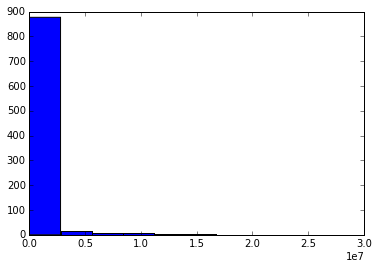

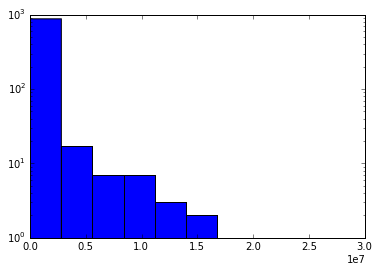

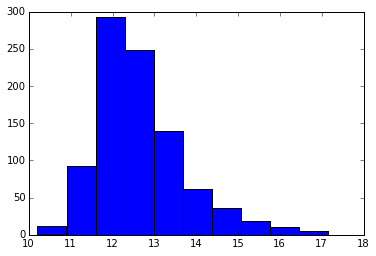

In [34]:
figure()
hist(views168)
figure()
hist(views168,log=True)
figure()
hist(np.log(views168))

(array([  17.,  200.,  334.,  194.,   81.,   46.,   19.,   13.,    9.,    3.]),
 array([ 19.65675435,  23.23474024,  26.81272613,  30.39071203,
         33.96869792,  37.54668381,  41.12466971,  44.7026556 ,
         48.28064149,  51.85862739,  55.43661328]),
 <a list of 10 Patch objects>)

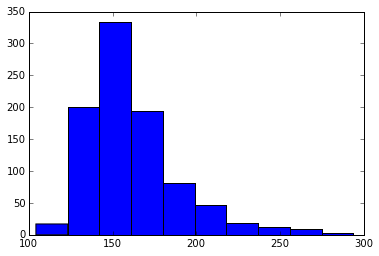

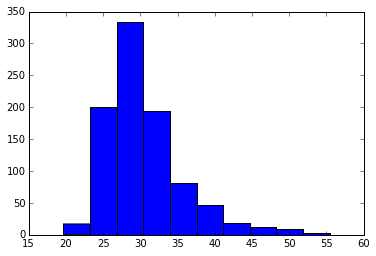

In [35]:
figure()
hist(np.log(views168)**2)
figure()
hist(np.log10(views168)**2)

In [53]:
def statsForViews(n):
        colname = "v"+str(n)
        views = df[colname]
        print "- stats for "+colname
        showStats(views)

def statsForLogViews(n):
    if n>0 and n<=168:
        colname = "v"+str(n)
        views = log(df[colname])
        print "- stats for log("+colname+")"
        showStats(views)
        
def showStats(views):
    colWidth = 10
    print "std: ".ljust(colWidth)+ str(np.std(views))
    print "mean: ".ljust(colWidth)+str(np.mean(views))
    print "median: ".ljust(colWidth)+str(np.median(views))
    print "min: ".ljust(colWidth)+str(np.min(views))
    print "max: ".ljust(colWidth)+str(np.max(views))

In [58]:
statsForViews(168)
statsForViews(24)
print""
statsForLogViews(168)
statsForLogViews(24)

- stats for v168
std:      2006867.48178
mean:     743209.837336
median:   252287.0
min:      27139
max:      27898237
- stats for v24
std:      923142.428323
mean:     376765.517467
median:   194357.5
min:      21173
max:      15284639

- stats for log(v168)
std:      1.06420054268
mean:     12.6547190395
median:   12.438321394
min:      10.2087270867
max:      17.1440740548
- stats for log(v24)
std:      0.850895711984
mean:     12.2909733204
median:   12.1774526891
min:      9.96048206406
max:      16.5423588951


In [60]:
v168_log = log(views168)

In [74]:
mean168 = np.mean(v168_log)
std168 = np.std(v168_log)
llimit = mean168 - 3*std168
print llimit
print exp(llimit)
rlimit = mean168 + 3*std168
print rlimit
print exp(rlimit)

9.46211741149
12863.0920918
15.8473206676
7627881.17089


In [69]:
v168_log[v168_log>rlimit]

45     16.121436
82     16.225912
161    16.522099
241    15.986644
328    16.550891
408    16.330674
419    16.413787
436    16.943528
442    16.139058
508    17.144074
539    16.735745
712    16.319377
754    15.975859
786    16.213897
863    15.989286
Name: v168, dtype: float64

In [71]:
views168[v168_log>rlimit]

45     10033455
82     11138435
161    14978083
241     8768213
328    15415606
408    12368624
419    13440554
436    22828673
442    10211832
508    27898237
539    18545642
712    12229694
754     8674159
786    11005409
863     8791417
Name: v168, dtype: int64

In [75]:
df[v168_log>rlimit]

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v159,v160,v161,v162,v163,v164,v165,v166,v167,v168
45,341163402640457_883980331692092,49977,98266,145737,194693,242437,286884,326954,362218,399272,...,9816339,9844733,9873049,9898949,9923881,9947421,9970041,9991540,10012671,10033455
82,341163402640457_886602391429886,83291,169013,249904,331721,415777,494565,566402,629365,687308,...,11094129,11099227,11104445,11109618,11114814,11119697,11124768,11129753,11134281,11138435
161,341163402640457_893289064094552,72015,129106,175588,217807,253318,289830,332860,397179,506014,...,14742774,14773267,14802693,14833545,14863666,14887462,14913084,14935097,14956882,14978083
241,341163402640457_899644443459014,93124,199273,328176,475577,621834,744537,839289,911370,968198,...,8589799,8609798,8631591,8652947,8672899,8692018,8711491,8730559,8749394,8768213
328,341163402640457_904856186271173,139518,325163,535548,782609,1014371,1277705,1509088,1764893,2000736,...,15388602,15392395,15395263,15399175,15402228,15405074,15407858,15410740,15413253,15415606
408,341163402640457_909732239116901,50422,99415,149658,159470,208229,243056,264071,282686,302224,...,12178625,12201900,12225459,12247753,12268478,12291947,12314227,12333639,12351818,12368624
419,341163402640457_910489299041195,27943,427931,1074644,1709611,2337572,2849395,3280907,3698991,4011457,...,13429474,13430742,13432078,13433315,13434551,13435755,13436818,13438068,13439393,13440554
436,341163402640457_911299422293516,122353,973903,1737730,2518686,3306221,4023023,4631497,5121304,5538428,...,22727302,22738183,22750857,22763298,22773150,22783548,22794402,22805975,22816650,22828673
442,341163402640457_912081598881965,86309,187521,310630,473073,669354,886439,1109838,1332495,1556940,...,10169909,10173093,10175694,10178418,10182407,10187048,10192034,10199070,10205724,10211832
508,341163402640457_916432811780177,83944,197165,343932,549952,821729,1106737,1535196,2001664,2463169,...,27692296,27707149,27725368,27748992,27772615,27798197,27824216,27849787,27874541,27898237


In [973]:
df_no = df[v168_log<rlimit].copy()
df_no.shape

(901, 169)

In [974]:
df_no = df_no[df_no["v1"]>0]
df_no.shape

(871, 169)

In [975]:
df_no = df_no.reset_index(drop=True)
df_no.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v159,v160,v161,v162,v163,v164,v165,v166,v167,v168
0,341163402640457_880956415327817,41457,82351,121691,162281,202702,241761,278878,314355,347958,...,1947135,1948609,1950140,1951974,1954527,1957281,1961155,1965494,1969985,1974771
1,341163402640457_880993045324154,54229,94312,125887,150893,171727,189382,205866,220667,234427,...,627780,631509,635930,640642,644468,648113,650700,654185,658586,663352
2,341163402640457_881021215321337,61661,113998,156881,194734,225624,255281,282687,307369,329960,...,1223954,1226818,1229271,1232155,1235054,1238125,1241653,1245985,1250054,1254839
3,341163402640457_881059645317494,22581,34326,42179,48756,54004,58748,62944,66424,69449,...,114291,114322,114342,114359,114409,114444,114494,114518,114534,114546
4,341163402640457_881099615313497,20540,33373,42701,50692,57932,63788,68611,72270,75336,...,152985,153006,153060,153106,153145,153184,153219,153251,153298,153338


(array([   8.,   41.,  139.,  252.,  183.,  117.,   56.,   41.,   18.,   16.]),
 array([ 10.20872709,  10.76532156,  11.32191603,  11.8785105 ,
         12.43510498,  12.99169945,  13.54829392,  14.10488839,
         14.66148286,  15.21807734,  15.77467181]),
 <a list of 10 Patch objects>)

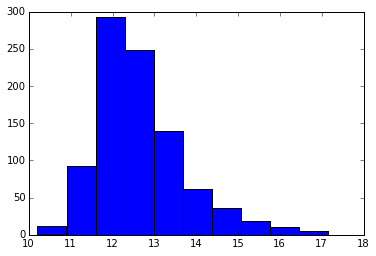

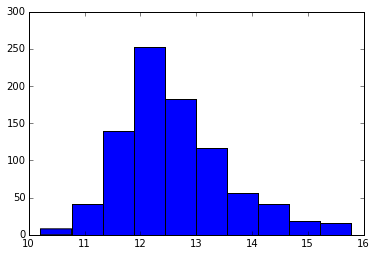

In [600]:
figure()
hist(np.log(views168))
figure()
hist(np.log(df_no["v168"]))

In [765]:
valuesOnly = df_no.loc[:,"v1":]
valuesOnly = valuesOnly

In [766]:
valuesMatrix = valuesOnly.as_matrix()
valuesMatrixLog = np.log(valuesMatrix)

In [767]:
cc = np.corrcoef(valuesMatrix.transpose())
cc_log = np.corrcoef(valuesMatrixLog.transpose())

In [768]:
cc168 = cc[-1]
cc_log168 = cc_log[-1]

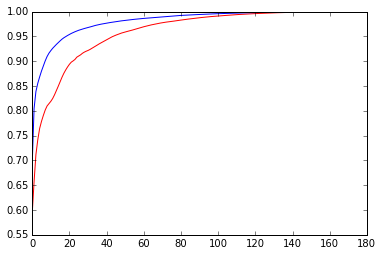

In [605]:
plot(cc168,color="red")
plot(cc_log168,color="blue")
show()

In [606]:
cc24 = cc168[:24]
cc_log24 = cc_log168[:24]

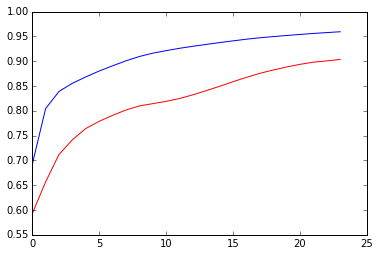

In [607]:
plot(cc24,color="red")
plot(cc_log24,color="blue")
show()

In [255]:
from sklearn.linear_model import LinearRegression

In [876]:
def extractHourViews(viewsMatrix):
    for i in range(viewsMatrix.shape[0]):
        for j in range(viewsMatrix.shape[1]-1,0,-1):
            viewsMatrix[i,j] = viewsMatrix[i,j] - viewsMatrix[i,j-1]
    return viewsMatrix

In [1048]:
def tryPredictor(n):
    featureColName = "v"+str(n)
    x = training.loc[:,featureColName].copy()
    y = training.loc[:,"v168"].copy()
    x = x.reshape(x.shape[0],1)
    y = y.reshape(y.shape[0],1)

    x = np.log(x+1)
    y = np.log(y)
    
    lr = LinearRegression(normalize=True, fit_intercept =False)
    lr.fit(x,y)

    test_x = testing.loc[:,featureColName].copy()
    test_y = testing.loc[:,"v168"]
    test_x= test_x.reshape(test_x.shape[0],1).copy()
    test_y = test_y.reshape(test_y.shape[0],1)
    
    test_x = np.log(test_x+1)
        
    preds = np.exp(lr.predict(test_x))
    
    #print mrse(preds,test_y)
    return mrse(preds,test_y)

In [1049]:
def tryMultiPredictor(n):
    featureColName = "v"+str(n)
    x = training.loc[:,"v1":featureColName].copy()
    y = training.loc[:,"v168"].copy()
    
    x = extractHourViews(np.asmatrix(x))
    y = y.reshape(y.shape[0],1)

    x = np.log(x+1)
    y = np.log(y)
    
    lr = LinearRegression(normalize=True, fit_intercept = False)
    lr.fit(x,y)

    test_x = testing.loc[:,"v1":featureColName].copy()
    test_y = testing.loc[:,"v168"].copy()
    test_x= extractHourViews(np.asmatrix(test_x))
    test_y = test_y.reshape(test_y.shape[0],1)
    
    test_x = np.log(test_x+1)
        
    preds = np.exp(lr.predict(test_x))

    #print mrse(preds,test_y)
    return mrse(preds,test_y)

In [804]:
tryPredictor(24)
tryMultiPredictor(24)

7.2687822505


7.2687822504970034

In [1064]:
count = df_no.shape[0]
indexes = np.arange(count)
np.random.shuffle(indexes)
treshold = int(count*0.9)
training = df_no.loc[indexes][:treshold].copy()
training = training.reset_index(drop=True)
testing = df_no.loc[indexes][treshold:].copy()
testing = testing.reset_index(drop=True)

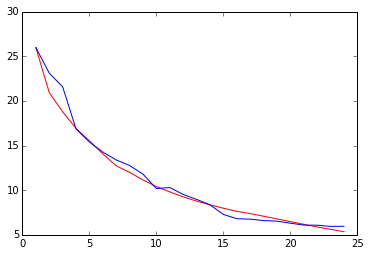

In [1065]:
n = 24
results = []
resultsMulti = []
hours = range(1,n+1)
for i in hours:
    resultsMulti.append(tryMultiPredictor(i))
    results.append(tryPredictor(i))


plot(hours,results,color="red")
plot(hours,resultsMulti,color="blue")
show()

In [985]:
def mrse(preds,labels):
    n = len(preds)
    return sum((preds/labels - 1)**2)/float(n)*100